In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data understanding, preparation and EDA
## 1.1 Data Inspection


In [2]:
# Importing the lead data
lead_data = pd.read_csv("../Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_data.info() # Understanding the columns and datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead_data.describe() # Analysing Numeric values

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_data.isnull().sum() # Counting null values in each columns

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## 1.2 Data Cleaning

In [6]:
lead_data["Lead Profile"].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [7]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [8]:
# Dropping ProspectID as it is a unique ID column and serves no purpose in analysis

lead_data= lead_data.drop(['Prospect ID'],axis=1)

In [9]:
# Checking columns with one unique value
lead_data.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [10]:
# Dropping columns with 1 values which is not usefull in analysis
lead_data= lead_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [11]:
# Checking null values percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [12]:
# Dropping columns with more than 35% missing values
lead_data = lead_data.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [13]:
# Checking country column value counts
lead_data.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [14]:
round(100*(lead_data.Country.value_counts()/len(lead_data.index)), 2)

Country
India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
China                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
Netherlands              0.02
Ghana                    0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Li

In [15]:
# 70% value is concentrated on 1 value and 26.63% is missing. Removing column country for stated reason
lead_data = lead_data.drop(['Country'], axis=1)

In [16]:
# Checking Lead Source value counts
lead_data["Lead Source"].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [17]:
# Correcting case sensitive spells and replacing null values with Google as they are the majority
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google', 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan, 'Google')

In [18]:
# Checking total visits value_counts
lead_data["TotalVisits"].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [19]:
# Filling null values with median for Total Visits
lead_data['TotalVisits'] = lead_data['TotalVisits'].replace(np.nan, lead_data['TotalVisits'].median())

In [20]:
# Checking Page Views Per Visit value_counts
lead_data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [21]:
# Filling null values with median for Page Views Per Visit
lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].replace(np.nan, lead_data['Page Views Per Visit'].median())

In [22]:
# checking Last Activity value counts
lead_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [23]:
# Filling null values with not provided in textual columns
lead_data['Last Activity'] = lead_data['Last Activity'].fillna('not provided')

In [24]:
# Checking value counts
lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [25]:
# Dropping the column since most of data is concentrated on one value and 29.32 is null
lead_data = lead_data.drop(['What matters most to you in choosing a course'], axis=1)

In [26]:
lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [27]:
# Filling null values with not provided in textual columns
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('not provided')


In [28]:
# Checking null values percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## 1.3 EDA

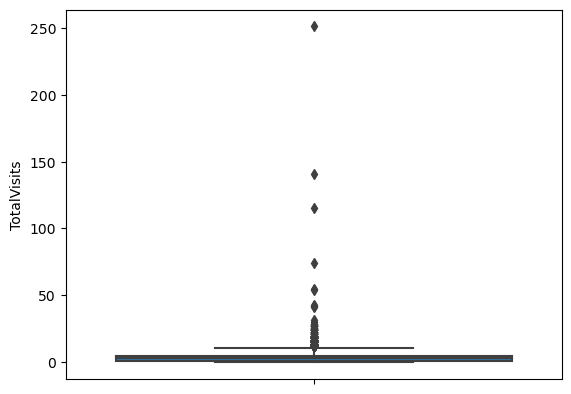

In [29]:
# Check the outliers in all the numeric columns
sns.boxplot(y = 'TotalVisits',  data = lead_data)
plt.show()

In [30]:
quantile_total_visits = lead_data['TotalVisits'].quantile(0.99)
print(quantile_total_visits)

17.0


In [31]:
# Removing values above 99 percentile
lead_data = lead_data[lead_data["TotalVisits"] < quantile_total_visits]

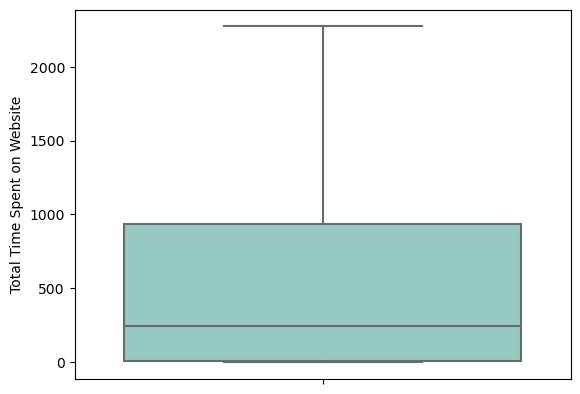

In [32]:
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = lead_data)
plt.show()

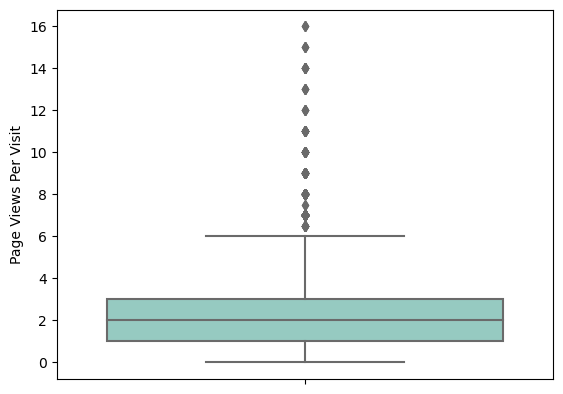

In [33]:
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = lead_data)
plt.show()

In [34]:
#Removeing values above 99 percentile
quartile_page_visits = lead_data['Page Views Per Visit'].quantile(0.99)
lead_data = lead_data[lead_data["Page Views Per Visit"] < quartile_page_visits]

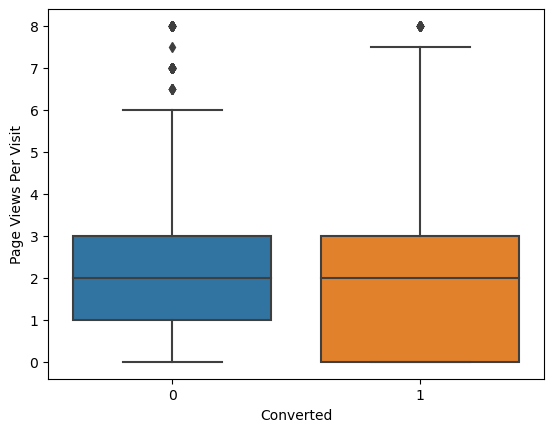

In [35]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data)
plt.show()

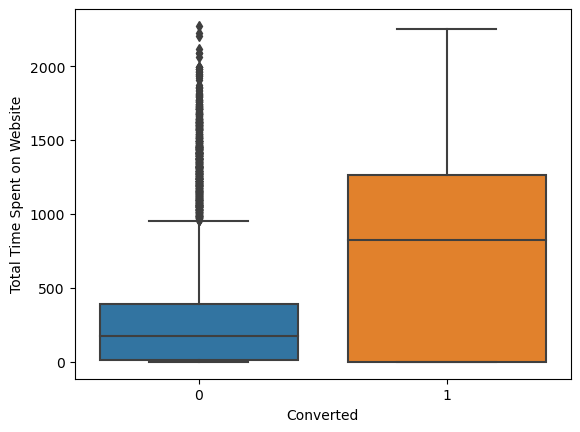

In [36]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data =lead_data)
plt.show()

#### More time spent on Website increases chances of Conversion

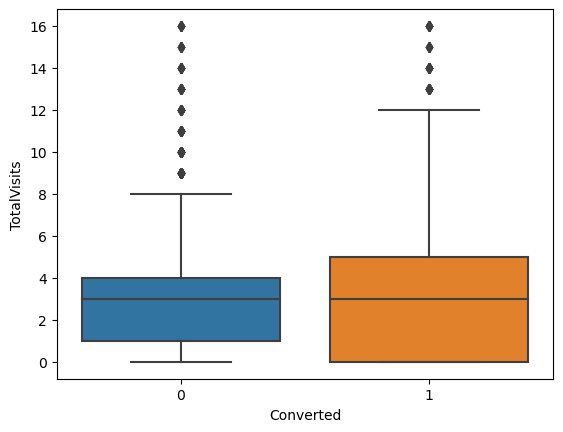

In [37]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data =lead_data)
plt.show()

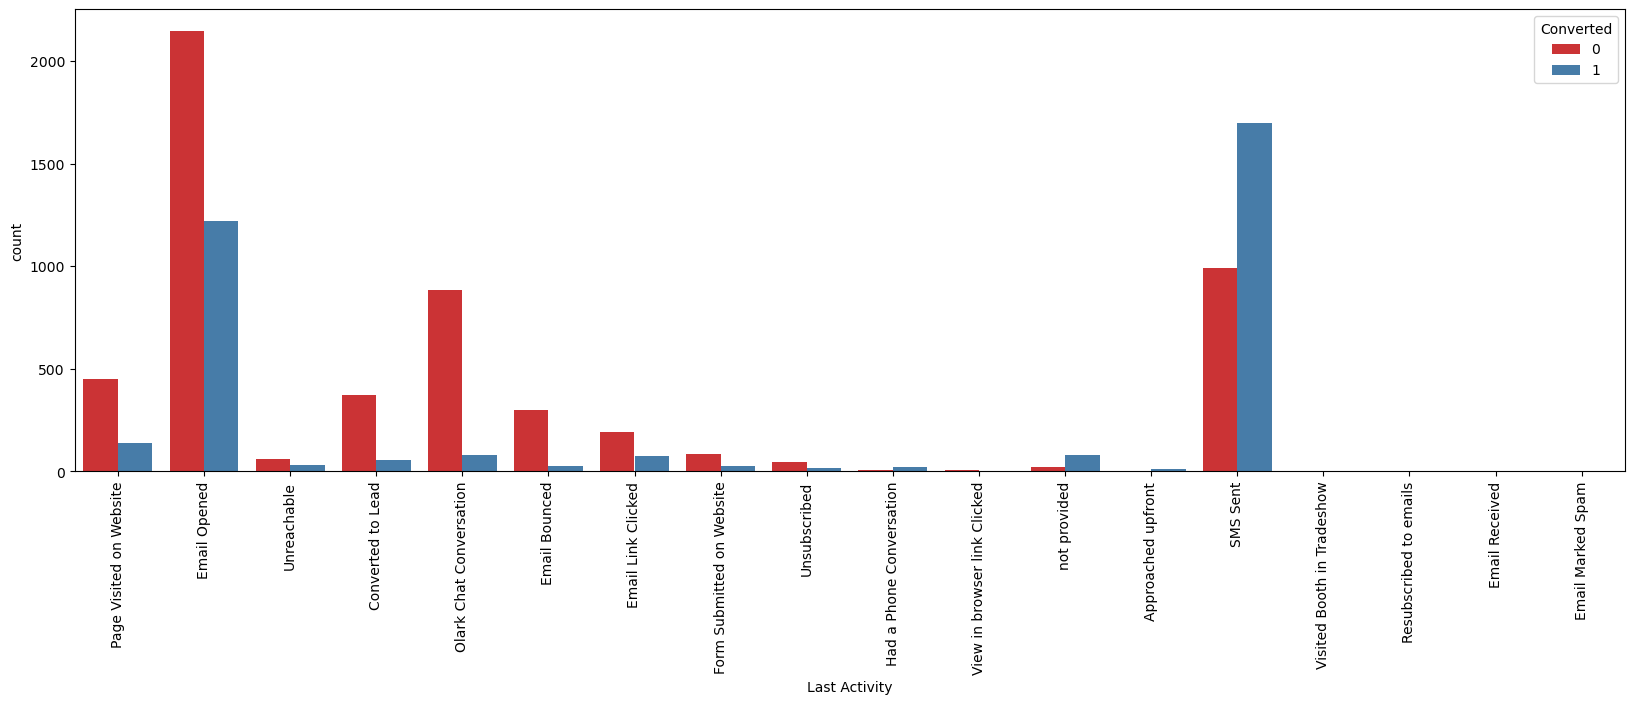

In [38]:
plt.figure(figsize=(20,6))
plt.xticks(rotation = 90)
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.show()

#### Last Activity SMS seems to have greater conversion rate

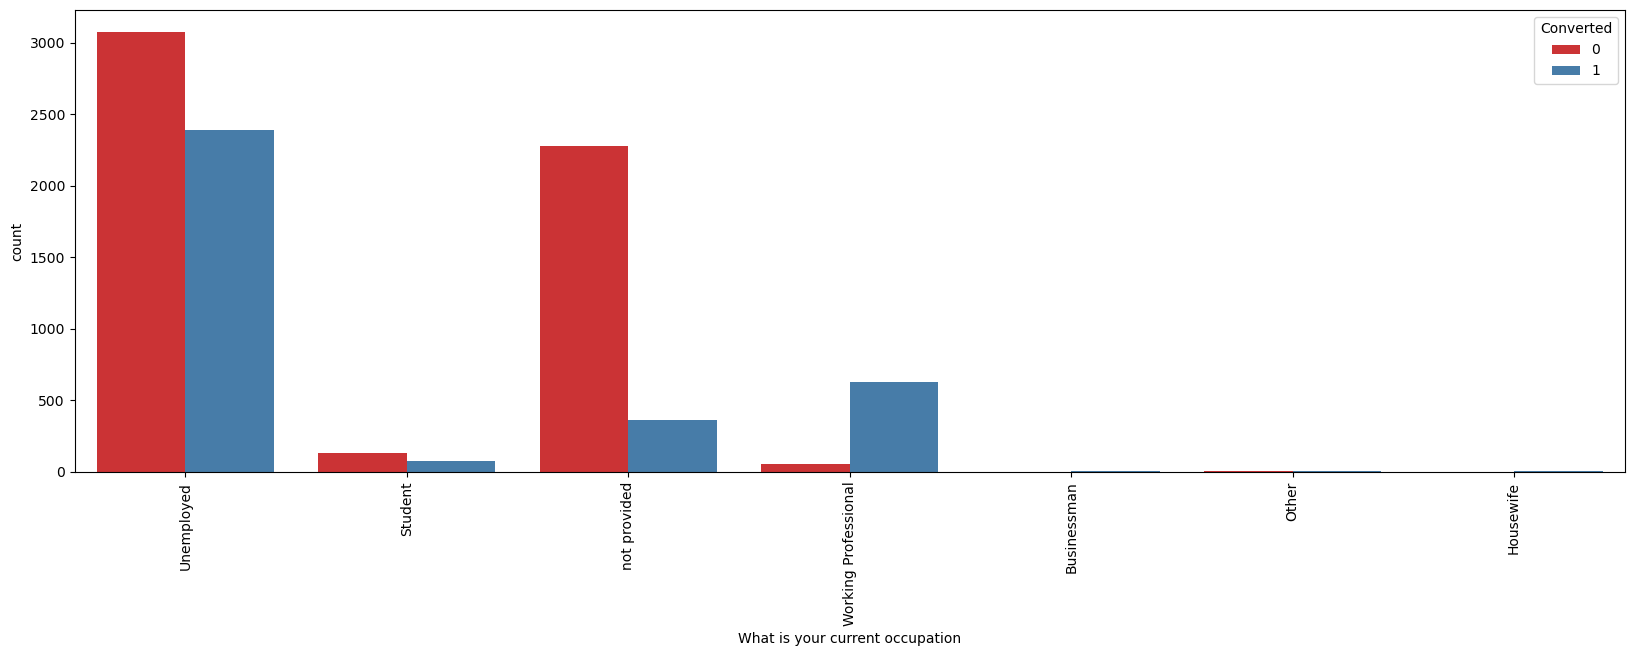

In [39]:
plt.figure(figsize=(20,6))
plt.xticks(rotation = 90)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.show()

#### Unemployed has maximum number of conversions
#### Occupation not known have high percentage of conversion

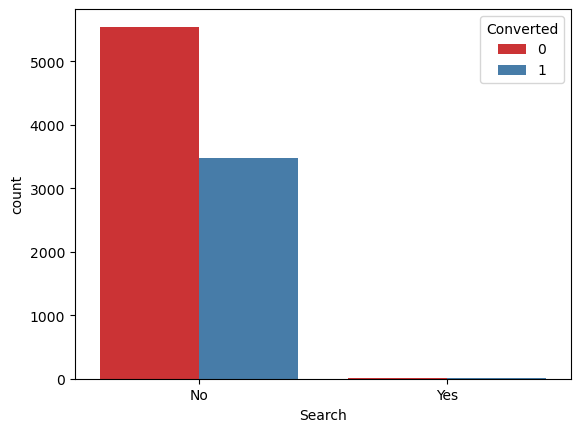

In [40]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set1')
plt.show()

#### Very low Yes data for any inferences

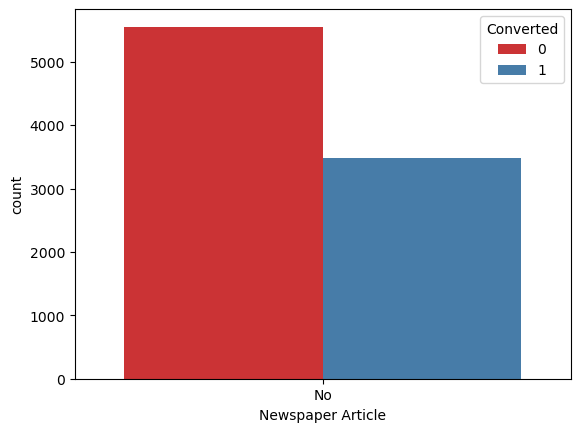

In [41]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set1')
plt.show()

In [42]:
lead_data['Newspaper Article'].value_counts()

Newspaper Article
No    9029
Name: count, dtype: int64

In [43]:
# Removing Newspaper Article as it has only 1 value
lead_data = lead_data.drop(["Newspaper Article"], axis=1)

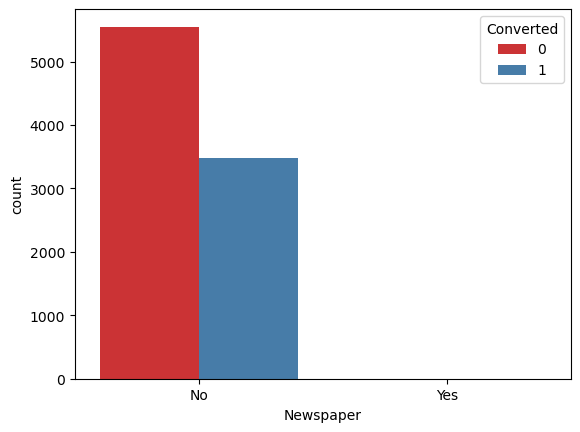

In [44]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set1')
plt.show()

In [45]:
lead_data['Newspaper'].value_counts()

Newspaper
No     9028
Yes       1
Name: count, dtype: int64

In [46]:
# Removing Newspaper as it has only 1 opposite value
lead_data = lead_data.drop(["Newspaper"], axis=1)

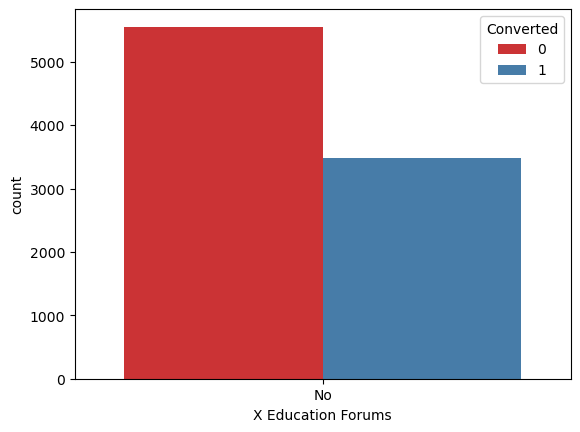

In [47]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set1')
plt.show()

In [48]:
lead_data['X Education Forums'].value_counts()

X Education Forums
No    9029
Name: count, dtype: int64

In [49]:
# Removing X Education Forums as it has only 1 value
lead_data = lead_data.drop(["X Education Forums"], axis=1)

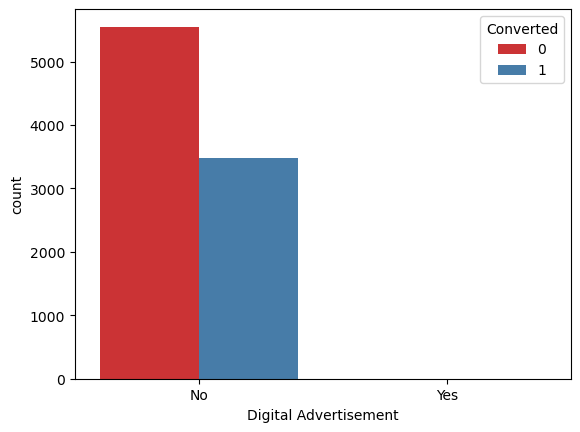

In [50]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set1')
plt.show()

In [51]:
lead_data['Digital Advertisement'].value_counts()

Digital Advertisement
No     9027
Yes       2
Name: count, dtype: int64

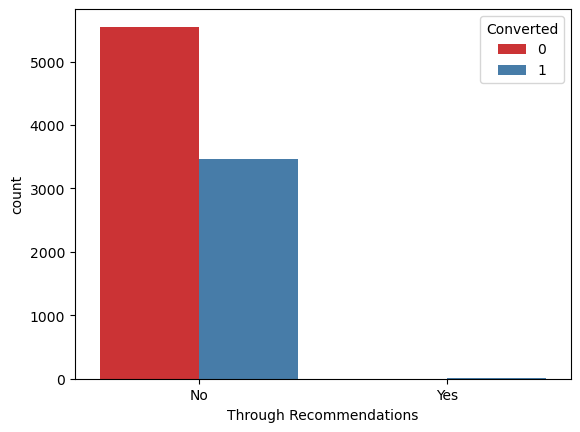

In [52]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set1')
plt.show()

In [53]:
lead_data['Through Recommendations'].value_counts()

Through Recommendations
No     9023
Yes       6
Name: count, dtype: int64

In [54]:
# Dropping Through Recommendation and Digital Advertisement as it has very low opposite data points
lead_data = lead_data.drop(["Through Recommendations","Digital Advertisement"], axis=1)

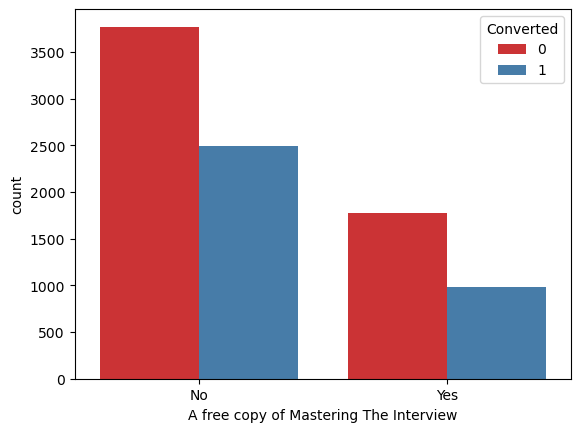

In [55]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data,palette='Set1')
plt.show()

#### Lead Conversion is high with no free copy of Masterinf the Interview

# 2 Data Modelling

## 2.1 Data Preparation

In [56]:
# Converting binary columns to 1,0
vars =  ['Do Not Email', 'Do Not Call', 'Search', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

In [57]:
# Creating Dummy Variables
lead_dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity']], drop_first=True)
lead_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [58]:
# Concenating lead_dummy into lead_data
lead_data = pd.concat([lead_data, lead_dummy], axis=1)
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,False,False,True,False,False,False,False,False,False,False
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,False,False,False,False,False,False,False,False,False,False
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,False,False,False,False,False,False,False,False,False,False
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,False,False,True,False,False,False,False,False,False,False
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,False,False,True,False,False,False,False,False,False,False


In [59]:
# Dropping columns for whom dummies were created
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity'], axis = 1)

## 2.2 Test Train Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = lead_data.drop(['Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,False,False,...,False,False,True,False,False,False,False,False,False,False
1,660728,0,0,5.0,674,2.5,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,660727,0,0,2.0,1532,2.0,0,1,True,False,...,False,False,False,False,False,False,False,False,False,False
3,660719,0,0,1.0,305,1.0,0,0,True,False,...,False,False,True,False,False,False,False,False,False,False
4,660681,0,0,2.0,1428,1.0,0,0,True,False,...,False,False,True,False,False,False,False,False,False,False


In [62]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=90)

## 2.3 Scaling Numeric Variables

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4448,616994,1,0,0.0000,0.000000,0.000,0,0,False,False,...,False,False,False,False,False,False,False,False,True,False
6782,597846,0,0,0.5000,0.103418,0.250,0,1,True,False,...,False,False,False,False,False,False,False,False,False,False
9055,580937,0,0,0.1250,0.153129,0.250,0,1,True,False,...,False,False,False,False,False,False,True,False,False,False
3991,621735,0,0,0.1250,0.003551,0.125,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
7465,592358,0,0,0.1875,0.000888,0.375,0,0,True,False,...,False,False,True,False,False,False,False,False,False,False


## 2.4 Feature Selection with RFE

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)


In [66]:
rfe.support_

array([ True,  True, False, False,  True, False, False,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False])

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 29),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Search', False, 27),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Origin_Quick Add Form', False, 34),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Live Chat', False, 28),
 ('Lead Source_NC_EDM', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 39),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 13),
 ('Lead Source_Social Media', False, 33),
 ('Lead Source_WeLearn', False, 45),
 ('Lead Source_Welingak Websit

In [68]:
# Selecting cols based on RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Lead Number', 'Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

## 2.5 Model Building

In [69]:
import statsmodels.api as sm

In [70]:
X_train_sm = sm.add_constant(X_train[cols]).astype(float)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()
# np.asarray(X_train_sm)
# X_train_sm.info()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.2
Date:                Tue, 23 Jul 2024   Deviance:                       5012.5
Time:                        18:44:34   Pearson chi2:                 5.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4165
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.6563      1.039     -8.332      0.000     -10.693      -6.620
Lead Number                                            1.12e-05   1.61e-06      6.955      0.000    8.05e-06    1.44e-05
Do Not Email                                            -1.0511      0.199     -5.279      0.000      -1.441      -0.661
Total Time Spent on Website                              4.6283      0.171     27.129      0.000       4.294       4.963
A free copy of Mastering The Interview                   0.0156      0.102      0.153      0.878      -0.184       0.215
Lead Origin_Landing Page Submission                     -0.1303      0.105     -1.243      0.214      -0.336       0.075
Lead Origin_Lead Add Form                                4.0718      0.393     10.349      0.000       3.301       4.843
Lead Source_Direct Traffic                              -0.2073      0.105     -1.976      0.048      -0.413      -0.002
Lead Source_Olark Chat                                   1.1813      0.125      9.424      0.000       0.936       1.427
Lead Source_Reference                                   -0.9190      0.425     -2.163      0.031      -1.752      -0.086
Last Activity_Converted to Lead                         -0.5185      0.250     -2.070      0.038      -1.009      -0.028
Last Activity_Email Bounced                             -0.5478      0.360     -1.521      0.128      -1.254       0.158
Last Activity_Email Opened                               0.2470      0.156      1.586      0.113      -0.058       0.552
Last Activity_Olark Chat Conversation                   -1.0062      0.215     -4.685      0.000      -1.427      -0.585
Last Activity_Page Visited on Website                   -0.1239      0.201     -0.616      0.538      -0.519       0.271
Last Activity_SMS Sent                                   0.6768      0.204      3.315      0.001       0.277       1.077
What is your current occupation_Unemployed              -0.2813      0.204     -1.377      0.168      -0.682       0.119
What is your current occupation_Working Professional     2.3724      0.286      8.294      0.000       1.812       2.933
What is your current occupation_not provided            -1.5402      0.216     -7.138      0.000      -1.963      -1.117
Last Notable Activity_Modified                          -0.3515      0.110     -3.182      0.001      -0.568      -0.135
Last Notable Activity_SMS Sent                           0.9719      0.193      5.044      0.000       0.594       1.349
========================================================================================================================
"""

In [71]:
# Dropping A free copy of Mastering The Interview Since p-value is very high
cols = cols.drop('A free copy of Mastering The Interview')

In [72]:
X_train_sm = sm.add_constant(X_train[cols]).astype(float)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.3
Date:                Tue, 23 Jul 2024   Deviance:                       5012.5
Time:                        18:44:48   Pearson chi2:                 5.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4165
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.6524      1.039     -8.331      0.000     -10.688      -6.617
Lead Number                                            1.12e-05   1.61e-06      6.954      0.000    8.04e-06    1.44e-05
Do Not Email                                            -1.0514      0.199     -5.280      0.000      -1.442      -0.661
Total Time Spent on Website                              4.6282      0.171     27.129      0.000       4.294       4.963
Lead Origin_Landing Page Submission                     -0.1257      0.100     -1.251      0.211      -0.323       0.071
Lead Origin_Lead Add Form                                4.0713      0.393     10.348      0.000       3.300       4.842
Lead Source_Direct Traffic                              -0.2000      0.094     -2.136      0.033      -0.384      -0.017
Lead Source_Olark Chat                                   1.1815      0.125      9.427      0.000       0.936       1.427
Lead Source_Reference                                   -0.9188      0.425     -2.163      0.031      -1.752      -0.086
Last Activity_Converted to Lead                         -0.5187      0.250     -2.071      0.038      -1.009      -0.028
Last Activity_Email Bounced                             -0.5487      0.360     -1.524      0.128      -1.254       0.157
Last Activity_Email Opened                               0.2467      0.156      1.585      0.113      -0.058       0.552
Last Activity_Olark Chat Conversation                   -1.0065      0.215     -4.686      0.000      -1.427      -0.586
Last Activity_Page Visited on Website                   -0.1243      0.201     -0.617      0.537      -0.519       0.270
Last Activity_SMS Sent                                   0.6771      0.204      3.317      0.001       0.277       1.077
What is your current occupation_Unemployed              -0.2804      0.204     -1.374      0.170      -0.681       0.120
What is your current occupation_Working Professional     2.3722      0.286      8.293      0.000       1.812       2.933
What is your current occupation_not provided            -1.5397      0.216     -7.137      0.000      -1.963      -1.117
Last Notable Activity_Modified                          -0.3520      0.110     -3.187      0.001      -0.568      -0.136
Last Notable Activity_SMS Sent                           0.9711      0.193      5.042      0.000       0.594       1.349
========================================================================================================================
"""

In [73]:
# Dropping Last Activity_Page Visited on Website since its p-value is very high
cols = cols.drop('Last Activity_Page Visited on Website')

In [74]:
X_train_sm = sm.add_constant(X_train[cols]).astype(float)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.5
Date:                Tue, 23 Jul 2024   Deviance:                       5012.9
Time:                        18:45:01   Pearson chi2:                 5.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4165
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.7335      1.030     -8.475      0.000     -10.753      -6.714
Lead Number                                           1.123e-05   1.61e-06      6.972      0.000    8.07e-06    1.44e-05
Do Not Email                                            -1.0496      0.199     -5.273      0.000      -1.440      -0.659
Total Time Spent on Website                              4.6278      0.171     27.134      0.000       4.294       4.962
Lead Origin_Landing Page Submission                     -0.1244      0.100     -1.238      0.216      -0.321       0.073
Lead Origin_Lead Add Form                                4.0796      0.394     10.365      0.000       3.308       4.851
Lead Source_Direct Traffic                              -0.2013      0.094     -2.151      0.031      -0.385      -0.018
Lead Source_Olark Chat                                   1.1855      0.125      9.468      0.000       0.940       1.431
Lead Source_Reference                                   -0.9183      0.425     -2.160      0.031      -1.752      -0.085
Last Activity_Converted to Lead                         -0.4583      0.231     -1.985      0.047      -0.911      -0.006
Last Activity_Email Bounced                             -0.4910      0.348     -1.411      0.158      -1.173       0.191
Last Activity_Email Opened                               0.3070      0.122      2.518      0.012       0.068       0.546
Last Activity_Olark Chat Conversation                   -0.9479      0.193     -4.907      0.000      -1.326      -0.569
Last Activity_SMS Sent                                   0.7362      0.181      4.073      0.000       0.382       1.091
What is your current occupation_Unemployed              -0.2781      0.204     -1.363      0.173      -0.678       0.122
What is your current occupation_Working Professional     2.3722      0.286      8.298      0.000       1.812       2.933
What is your current occupation_not provided            -1.5388      0.216     -7.137      0.000      -1.961      -1.116
Last Notable Activity_Modified                          -0.3507      0.110     -3.177      0.001      -0.567      -0.134
Last Notable Activity_SMS Sent                           0.9728      0.193      5.051      0.000       0.595       1.350
========================================================================================================================
"""

In [75]:
#Dropping Lead Origin_Landing Page Submission since its p-value is very high
cols = cols.drop('Lead Origin_Landing Page Submission')

In [76]:
X_train_sm = sm.add_constant(X_train[cols]).astype(float)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.2
Date:                Tue, 23 Jul 2024   Deviance:                       5014.4
Time:                        18:45:12   Pearson chi2:                 5.99e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4163
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.8703      1.025     -8.657      0.000     -10.879      -6.862
Lead Number                                           1.133e-05   1.61e-06      7.047      0.000    8.18e-06    1.45e-05
Do Not Email                                            -1.0550      0.199     -5.310      0.000      -1.444      -0.666
Total Time Spent on Website                              4.6249      0.170     27.129      0.000       4.291       4.959
Lead Origin_Lead Add Form                                4.1542      0.389     10.675      0.000       3.391       4.917
Lead Source_Direct Traffic                              -0.2473      0.086     -2.882      0.004      -0.416      -0.079
Lead Source_Olark Chat                                   1.2554      0.112     11.192      0.000       1.036       1.475
Lead Source_Reference                                   -0.9196      0.425     -2.162      0.031      -1.753      -0.086
Last Activity_Converted to Lead                         -0.4474      0.231     -1.939      0.052      -0.900       0.005
Last Activity_Email Bounced                             -0.4893      0.348     -1.407      0.159      -1.171       0.192
Last Activity_Email Opened                               0.3068      0.122      2.516      0.012       0.068       0.546
Last Activity_Olark Chat Conversation                   -0.9321      0.193     -4.835      0.000      -1.310      -0.554
Last Activity_SMS Sent                                   0.7311      0.181      4.049      0.000       0.377       1.085
What is your current occupation_Unemployed              -0.2793      0.204     -1.370      0.171      -0.679       0.120
What is your current occupation_Working Professional     2.3636      0.286      8.275      0.000       1.804       2.923
What is your current occupation_not provided            -1.5366      0.215     -7.132      0.000      -1.959      -1.114
Last Notable Activity_Modified                          -0.3485      0.110     -3.157      0.002      -0.565      -0.132
Last Notable Activity_SMS Sent                           0.9763      0.193      5.071      0.000       0.599       1.354
========================================================================================================================
"""

In [77]:
#Dropping What is your current occupation_Unemployed since its p-value is very high
cols = cols.drop('What is your current occupation_Unemployed')

In [78]:
X_train_sm = sm.add_constant(X_train[cols]).astype(float)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2508.1
Date:                Tue, 23 Jul 2024   Deviance:                       5016.3
Time:                        18:45:26   Pearson chi2:                 6.00e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4162
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -9.0682      1.015     -8.936      0.000     -11.057      -7.079
Lead Number                                           1.122e-05    1.6e-06      6.990      0.000    8.07e-06    1.44e-05
Do Not Email                                            -1.0569      0.199     -5.318      0.000      -1.447      -0.667
Total Time Spent on Website                              4.6270      0.170     27.142      0.000       4.293       4.961
Lead Origin_Lead Add Form                                4.1466      0.389     10.662      0.000       3.384       4.909
Lead Source_Direct Traffic                              -0.2450      0.086     -2.857      0.004      -0.413      -0.077
Lead Source_Olark Chat                                   1.2591      0.112     11.226      0.000       1.039       1.479
Lead Source_Reference                                   -0.8961      0.425     -2.109      0.035      -1.729      -0.063
Last Activity_Converted to Lead                         -0.4480      0.231     -1.941      0.052      -0.900       0.004
Last Activity_Email Bounced                             -0.4859      0.348     -1.397      0.162      -1.168       0.196
Last Activity_Email Opened                               0.3065      0.122      2.514      0.012       0.068       0.545
Last Activity_Olark Chat Conversation                   -0.9302      0.193     -4.827      0.000      -1.308      -0.553
Last Activity_SMS Sent                                   0.7228      0.180      4.006      0.000       0.369       1.076
What is your current occupation_Working Professional     2.6296      0.210     12.539      0.000       2.219       3.041
What is your current occupation_not provided            -1.2685      0.090    -14.039      0.000      -1.446      -1.091
Last Notable Activity_Modified                          -0.3466      0.110     -3.140      0.002      -0.563      -0.130
Last Notable Activity_SMS Sent                           0.9756      0.192      5.069      0.000       0.598       1.353
========================================================================================================================
"""

In [79]:
# Dropping Last Activity_Email Bounced since its p-value is high
cols = cols.drop('Last Activity_Email Bounced')

In [80]:
X_train_sm = sm.add_constant(X_train[cols]).astype(float)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2509.2
Date:                Tue, 23 Jul 2024   Deviance:                       5018.3
Time:                        18:45:34   Pearson chi2:                 5.98e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4160
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -9.0810      1.015     -8.951      0.000     -11.070      -7.092
Lead Number                                            1.12e-05    1.6e-06      6.980      0.000    8.05e-06    1.43e-05
Do Not Email                                            -1.1867      0.178     -6.670      0.000      -1.535      -0.838
Total Time Spent on Website                              4.6250      0.170     27.128      0.000       4.291       4.959
Lead Origin_Lead Add Form                                4.1459      0.388     10.679      0.000       3.385       4.907
Lead Source_Direct Traffic                              -0.2439      0.086     -2.844      0.004      -0.412      -0.076
Lead Source_Olark Chat                                   1.2562      0.112     11.203      0.000       1.036       1.476
Lead Source_Reference                                   -0.8911      0.424     -2.101      0.036      -1.723      -0.060
Last Activity_Converted to Lead                         -0.4103      0.229     -1.788      0.074      -0.860       0.039
Last Activity_Email Opened                               0.3343      0.121      2.769      0.006       0.098       0.571
Last Activity_Olark Chat Conversation                   -0.8920      0.191     -4.668      0.000      -1.266      -0.517
Last Activity_SMS Sent                                   0.7674      0.178      4.310      0.000       0.418       1.116
What is your current occupation_Working Professional     2.6269      0.209     12.560      0.000       2.217       3.037
What is your current occupation_not provided            -1.2679      0.090    -14.032      0.000      -1.445      -1.091
Last Notable Activity_Modified                          -0.3586      0.110     -3.258      0.001      -0.574      -0.143
Last Notable Activity_SMS Sent                           0.9643      0.192      5.012      0.000       0.587       1.341
========================================================================================================================
"""

In [81]:
# Dropping Last Activity_Converted to Lead since its p-value is high
cols = cols.drop('Last Activity_Converted to Lead')

In [82]:
X_train_sm = sm.add_constant(X_train[cols]).astype(float)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.8
Date:                Tue, 23 Jul 2024   Deviance:                       5021.6
Time:                        18:47:03   Pearson chi2:                 5.98e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4157
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -9.1518      1.013     -9.030      0.000     -11.138      -7.166
Lead Number                                           1.122e-05    1.6e-06      6.994      0.000    8.07e-06    1.44e-05
Do Not Email                                            -1.1444      0.177     -6.464      0.000      -1.491      -0.797
Total Time Spent on Website                              4.6340      0.170     27.198      0.000       4.300       4.968
Lead Origin_Lead Add Form                                4.1606      0.388     10.712      0.000       3.399       4.922
Lead Source_Direct Traffic                              -0.2482      0.086     -2.897      0.004      -0.416      -0.080
Lead Source_Olark Chat                                   1.2686      0.112     11.321      0.000       1.049       1.488
Lead Source_Reference                                   -0.8808      0.424     -2.075      0.038      -1.713      -0.049
Last Activity_Email Opened                               0.3984      0.116      3.426      0.001       0.170       0.626
Last Activity_Olark Chat Conversation                   -0.8063      0.186     -4.343      0.000      -1.170      -0.442
Last Activity_SMS Sent                                   0.8668      0.170      5.100      0.000       0.534       1.200
What is your current occupation_Working Professional     2.6180      0.209     12.539      0.000       2.209       3.027
What is your current occupation_not provided            -1.2688      0.090    -14.046      0.000      -1.446      -1.092
Last Notable Activity_Modified                          -0.4037      0.108     -3.746      0.000      -0.615      -0.192
Last Notable Activity_SMS Sent                           0.9202      0.191      4.812      0.000       0.545       1.295
========================================================================================================================
"""

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a generic function to calculate VIF
def checkVIF(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [87]:
# Checking VIF
checkVIF(X_train[cols].astype(float))

,Features,VIF
0,Lead Number,12.66
13,Last Notable Activity_SMS Sent,6.93
9,Last Activity_SMS Sent,6.52
3,Lead Origin_Lead Add Form,4.59
6,Lead Source_Reference,4.37
7,Last Activity_Email Opened,3.92
12,Last Notable Activity_Modified,3.17
2,Total Time Spent on Website,2.24
5,Lead Source_Olark Chat,1.92
8,Last Activity_Olark Chat Conversation,1.87


In [89]:
# Dropping Lead Number since its VIF is high
cols = cols.drop('Lead Number')

In [90]:
X_train_sm = sm.add_constant(X_train[cols]).astype(float)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2535.6
Date:                Tue, 23 Jul 2024   Deviance:                       5071.2
Time:                        18:54:48   Pearson chi2:                 6.11e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4111
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1522      0.132    -16.364      0.000      -2.410      -1.894
Do Not Email                                            -1.1965      0.176     -6.807      0.000      -1.541      -0.852
Total Time Spent on Website                              4.6029      0.169     27.177      0.000       4.271       4.935
Lead Origin_Lead Add Form                                4.1189      0.386     10.684      0.000       3.363       4.874
Lead Source_Direct Traffic                              -0.3570      0.084     -4.256      0.000      -0.521      -0.193
Lead Source_Olark Chat                                   1.1662      0.110     10.590      0.000       0.950       1.382
Lead Source_Reference                                   -0.8712      0.421     -2.067      0.039      -1.697      -0.045
Last Activity_Email Opened                               0.3966      0.116      3.427      0.001       0.170       0.623
Last Activity_Olark Chat Conversation                   -0.8205      0.185     -4.437      0.000      -1.183      -0.458
Last Activity_SMS Sent                                   0.8571      0.169      5.080      0.000       0.526       1.188
What is your current occupation_Working Professional     2.6044      0.208     12.497      0.000       2.196       3.013
What is your current occupation_not provided            -1.2488      0.090    -13.855      0.000      -1.425      -1.072
Last Notable Activity_Modified                          -0.3651      0.107     -3.405      0.001      -0.575      -0.155
Last Notable Activity_SMS Sent                           0.8142      0.189      4.302      0.000       0.443       1.185
========================================================================================================================
"""

In [91]:
# Checking VIF
checkVIF(X_train[cols].astype(float))

,Features,VIF
8,Last Activity_SMS Sent,6.33
12,Last Notable Activity_SMS Sent,6.25
2,Lead Origin_Lead Add Form,4.51
5,Lead Source_Reference,4.37
11,Last Notable Activity_Modified,2.11
1,Total Time Spent on Website,1.93
4,Lead Source_Olark Chat,1.82
6,Last Activity_Email Opened,1.81
7,Last Activity_Olark Chat Conversation,1.73
10,What is your current occupation_not provided,1.56


In [92]:
# Dropping Lead Number since its VIF is high
cols = cols.drop('Last Activity_SMS Sent')

In [93]:
X_train_sm = sm.add_constant(X_train[cols]).astype(float)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2548.3
Date:                Tue, 23 Jul 2024   Deviance:                       5096.5
Time:                        18:55:24   Pearson chi2:                 6.20e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4087
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0245      0.127    -15.971      0.000      -2.273      -1.776
Do Not Email                                            -1.2655      0.174     -7.257      0.000      -1.607      -0.924
Total Time Spent on Website                              4.6083      0.169     27.280      0.000       4.277       4.939
Lead Origin_Lead Add Form                                4.2023      0.386     10.890      0.000       3.446       4.959
Lead Source_Direct Traffic                              -0.3589      0.084     -4.291      0.000      -0.523      -0.195
Lead Source_Olark Chat                                   1.1694      0.110     10.644      0.000       0.954       1.385
Lead Source_Reference                                   -0.9196      0.422     -2.180      0.029      -1.746      -0.093
Last Activity_Email Opened                               0.2408      0.110      2.197      0.028       0.026       0.456
Last Activity_Olark Chat Conversation                   -1.0460      0.178     -5.872      0.000      -1.395      -0.697
What is your current occupation_Working Professional     2.6047      0.207     12.561      0.000       2.198       3.011
What is your current occupation_not provided            -1.2171      0.090    -13.573      0.000      -1.393      -1.041
Last Notable Activity_Modified                          -0.2530      0.103     -2.446      0.014      -0.456      -0.050
Last Notable Activity_SMS Sent                           1.5397      0.126     12.263      0.000       1.294       1.786
========================================================================================================================
"""

In [94]:
# Checking VIF
checkVIF(X_train[cols].astype(float))

,Features,VIF
2,Lead Origin_Lead Add Form,4.49
5,Lead Source_Reference,4.37
1,Total Time Spent on Website,1.92
10,Last Notable Activity_Modified,1.84
4,Lead Source_Olark Chat,1.82
6,Last Activity_Email Opened,1.76
11,Last Notable Activity_SMS Sent,1.67
7,Last Activity_Olark Chat Conversation,1.63
9,What is your current occupation_not provided,1.54
3,Lead Source_Direct Traffic,1.52


In [95]:
# Dropping Lead Number since its VIF is high
cols = cols.drop('Lead Origin_Lead Add Form')

In [96]:
X_train_sm = sm.add_constant(X_train[cols]).astype(float)
model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.1
Date:                Tue, 23 Jul 2024   Deviance:                       5356.2
Time:                        18:56:43   Pearson chi2:                 6.13e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6975      0.120    -14.124      0.000      -1.933      -1.462
Do Not Email                                            -1.0442      0.162     -6.465      0.000      -1.361      -0.728
Total Time Spent on Website                              4.1192      0.160     25.733      0.000       3.805       4.433
Lead Source_Direct Traffic                              -0.5492      0.081     -6.768      0.000      -0.708      -0.390
Lead Source_Olark Chat                                   0.8744      0.105      8.295      0.000       0.668       1.081
Lead Source_Reference                                    2.9447      0.196     15.007      0.000       2.560       3.329
Last Activity_Email Opened                               0.2416      0.106      2.275      0.023       0.033       0.450
Last Activity_Olark Chat Conversation                   -1.0928      0.175     -6.237      0.000      -1.436      -0.749
What is your current occupation_Working Professional     2.4865      0.205     12.116      0.000       2.084       2.889
What is your current occupation_not provided            -1.3079      0.088    -14.857      0.000      -1.480      -1.135
Last Notable Activity_Modified                          -0.2224      0.100     -2.214      0.027      -0.419      -0.026
Last Notable Activity_SMS Sent                           1.5807      0.122     12.966      0.000       1.342       1.820
========================================================================================================================
"""

In [97]:
# Checking VIF
checkVIF(X_train[cols].astype(float))

,Features,VIF
1,Total Time Spent on Website,1.90
9,Last Notable Activity_Modified,1.81
3,Lead Source_Olark Chat,1.80
5,Last Activity_Email Opened,1.72
6,Last Activity_Olark Chat Conversation,1.63
10,Last Notable Activity_SMS Sent,1.60
8,What is your current occupation_not provided,1.53
2,Lead Source_Direct Traffic,1.51
4,Lead Source_Reference,1.24
7,What is your current occupation_Working Profes...,1.21


#### VIF and p-value seems to be in range for further analysis

## 2.6 Making Prediction & Result Analysis

In [99]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

4448    0.133849
6782    0.088039
9055    0.491187
3991    0.361958
7465    0.038266
4891    0.358587
958     0.065228
1557    0.896545
9078    0.045832
8748    0.856490
dtype: float64

In [101]:
# Merging Prediction with actual converted
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
4448,0,0.133849
6782,0,0.088039
9055,0,0.491187
3991,0,0.361958
7465,0,0.038266


In [103]:
# Creating column to show predicted if value > 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted
4448,0,0.133849,0
6782,0,0.088039,0
9055,0,0.491187,0
3991,0,0.361958,0
7465,0,0.038266,0


In [104]:
# Analysing Confusion Matrix
from sklearn import metrics

In [105]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3406  488]
 [ 782 1644]]


In [106]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3406      488
# converted            782       1644  

In [109]:
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Accuracy :',round(accuracy*100, 2))

Accuracy : 79.91


#### Accuracy of 79.91 seems good

#### Analysing Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Sensitivity

print('Sensitivity :',round((TP / float(TP+FN))*100, 2))

Sensitivity : 67.77


In [113]:
# Specificity

print('Specificity :',round((TN / float(TN+FP))*100, 2))

Specificity : 87.47


In [117]:
# False Positive

print('False Positive :',round((FP/ float(TN+FP))*100, 2))

False Positive : 12.53


In [119]:
# Postitive Predictive Value

print('Postitive Predictive Value :',round((TP / float(TP+FP))*100, 2))

Postitive Predictive Value : 77.11


In [120]:
# Negative Predictive Value

print('Negative Predictive Value :',round((TN / float(TN+ FN))*100, 2))

Negative Predictive Value : 81.33


### ROC Curve

In [121]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

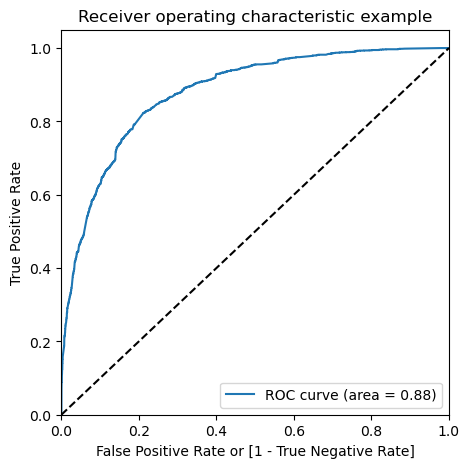

In [125]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### We have ROC Curve area under 0.88 which indicates our model is good

### Finding Optimal Cutoff Point

In [128]:
# Creating columns for different probability cutoffs from 0 to 1
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4448,0,0.133849,0,1,1,0,0,0,0,0,0,0,0
6782,0,0.088039,0,1,0,0,0,0,0,0,0,0,0
9055,0,0.491187,0,1,1,1,1,1,0,0,0,0,0
3991,0,0.361958,0,1,1,1,1,0,0,0,0,0,0
7465,0,0.038266,0,1,0,0,0,0,0,0,0,0,0


In [129]:
# Calculating accuracy, sensitivity, and specificity at different values of probabiity cutoffs
from sklearn.metrics import confusion_matrix

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.383861,1.000000,0.000000
0.1,0.1,0.589715,0.979802,0.346687
0.2,0.2,0.734494,0.910965,0.624551
0.3,0.3,0.786709,0.852432,0.745763
0.4,0.4,0.806329,0.764221,0.832563
0.5,0.5,0.799051,0.677659,0.874679
0.6,0.6,0.791772,0.596455,0.913457
0.7,0.7,0.768196,0.481451,0.946841
0.8,0.8,0.744778,0.384584,0.969183
0.9,0.9,0.706329,0.254740,0.987673


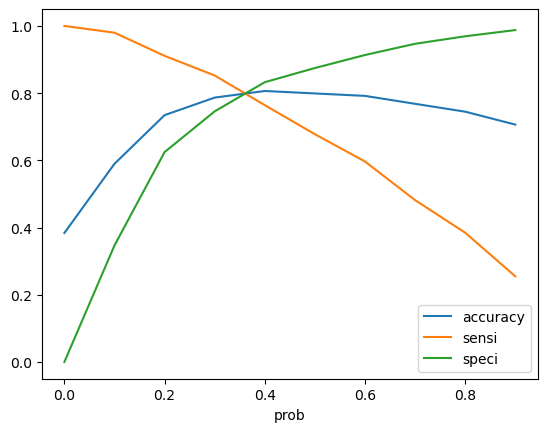

In [130]:
# Plotting accuracy sensitivity and specificity to identify the cut-off

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Curve indicates 0.37 is the optimum point to take it as a cutoff probability.

In [131]:
# Making final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4448,0,0.133849,0,1,1,0,0,0,0,0,0,0,0,0
6782,0,0.088039,0,1,0,0,0,0,0,0,0,0,0,0
9055,0,0.491187,0,1,1,1,1,1,0,0,0,0,0,1
3991,0,0.361958,0,1,1,1,1,0,0,0,0,0,0,0
7465,0,0.038266,0,1,0,0,0,0,0,0,0,0,0,0


In [134]:
# Calculating Lead Score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
4448,0,0.133849,0,1,1,0,0,0,0,0,0,0,0,0,13
6782,0,0.088039,0,1,0,0,0,0,0,0,0,0,0,0,9
9055,0,0.491187,0,1,1,1,1,1,0,0,0,0,0,1,49
3991,0,0.361958,0,1,1,1,1,0,0,0,0,0,0,0,36
7465,0,0.038266,0,1,0,0,0,0,0,0,0,0,0,0,4


In [136]:
# Overall Accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print('Accuracy :',round(accuracy*100, 2))

Accuracy : 80.43


In [138]:
# Analysing Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3195,  699],
       [ 538, 1888]], dtype=int64)

In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
# Sensitivity

print('Sensitivity :',round((TP / float(TP+FN))*100, 2))

Sensitivity : 77.82


In [141]:
# Specificity

print('Specificity :',round((TN / float(TN+FP))*100, 2))

Specificity : 82.05


In [142]:
# False Positive

print('False Positive :',round((FP/ float(TN+FP))*100, 2))

False Positive : 17.95


In [143]:
# Postitive Predictive Value

print('Postitive Predictive Value :',round((TP / float(TP+FP))*100, 2))

Postitive Predictive Value : 72.98


In [144]:
# Analysing Precision and Recall
from sklearn.metrics import precision_score, recall_score

In [146]:
precision =precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Precision :',round(precision*100, 2))

Accuracy : 77.11


In [147]:
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Recall :',round(recall*100, 2))

Recall : 67.77


### Precision Recall Curve

In [148]:
from sklearn.metrics import precision_recall_curve

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

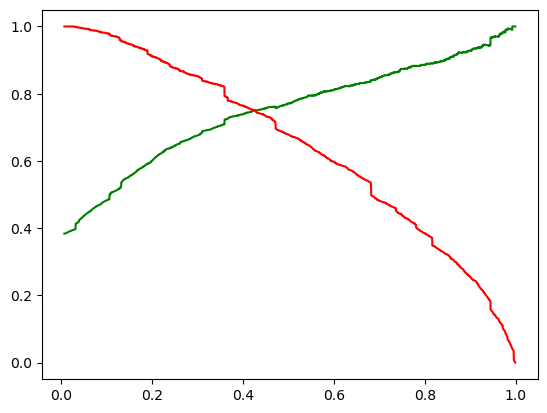

In [153]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 2.7 Prediction on test set

In [154]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [156]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,What is your current occupation_not provided,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
3446,0,0.421660,False,False,False,False,False,False,False,True,False
263,0,0.000000,False,True,False,False,True,False,True,True,False
4495,0,0.063915,False,False,False,True,False,False,False,False,False
5855,0,0.000000,False,True,False,False,True,False,False,True,False
6575,0,0.000000,False,True,False,False,True,False,True,False,False


In [159]:
X_test_sm = sm.add_constant(X_test).astype(float)

In [161]:
y_test_pred = result.predict(X_test_sm)

In [162]:
y_test_pred[:10]

3446    0.454367
263     0.030881
4495    0.232788
5855    0.105426
6575    0.038279
5419    0.243400
7143    0.192439
3799    0.067555
2621    0.412105
830     0.107953
dtype: float64

In [163]:
y_pred = pd.DataFrame(y_test_pred)

In [164]:
y_pred.head()

,0
3446,0.454367
263,0.030881
4495,0.232788
5855,0.105426
6575,0.038279


In [165]:
y_test_df = pd.DataFrame(y_test)

In [166]:
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [168]:
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [169]:
y_pred_final.head()

,Converted,0
0,1,0.454367
1,0,0.030881
2,0,0.232788
3,0,0.105426
4,0,0.038279


In [170]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [172]:
# Checking the conversion probability on 0.37
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

In [173]:
y_pred_final.head()

,Converted,Converted_prob,final_predicted
0,1,0.454367,1
1,0,0.030881,0
2,0,0.232788,0
3,0,0.105426,0
4,0,0.038279,0


In [175]:
# Calculating the Lead Score
y_pred_final['lead_score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Converted_prob,final_predicted,lead_score
0,1,0.454367,1,45
1,0,0.030881,0,3
2,0,0.232788,0,23
3,0,0.105426,0,11
4,0,0.038279,0,4


In [176]:
# Overall accuracy.
accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print('Accuracy :',round(accuracy*100, 2))

Accuracy : 79.66


In [177]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1343,  315],
       [ 236,  815]], dtype=int64)

In [178]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [179]:
# Sensitivity

print('Sensitivity :',round((TP / float(TP+FN))*100, 2))

Sensitivity : 77.55


In [180]:
# Specificity

print('Specificity :',round((TN / float(TN+FP))*100, 2))

Specificity : 81.0


In [181]:
# False Positive

print('False Positive :',round((FP/ float(TN+FP))*100, 2))

False Positive : 19.0


In [182]:
# Postitive Predictive Value

print('Postitive Predictive Value :',round((TP / float(TP+FP))*100, 2))

Postitive Predictive Value : 72.12


In [184]:
# Precision 

precision =precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
print('Precision :',round(precision*100, 2))

Precision : 72.12


In [185]:
# Recall 

recall =recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
print('recall :',round(recall*100, 2))

recall : 77.55


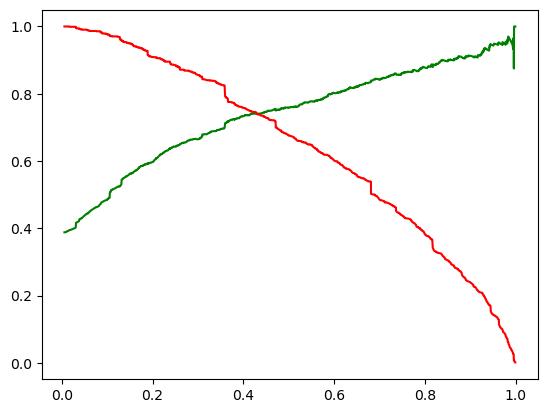

In [186]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Conclution

#### Observation on Train and Test set prediction after obtaining the optimal cut-off point at 0.37

#### Train Set:
#### Accuracy : 80.43
#### Sensitivity : 77.82
#### Specificity : 82.05

#### Test Set:
#### Accuracy : 79.66
#### Sensitivity : 77.55
#### Specificity : 81.0

#### Accuracy of the Train and test set is around 79-80% and there is no significant change in percentage between Train and Test set indicates that the model is good